In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Replace with reading in train and test data from wherever
train = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/test.csv')

In [4]:
train = train.drop('Unnamed: 0', axis = 1)
test = test.drop('Unnamed: 0', axis = 1)

In [5]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [6]:
train_sample = train.groupby('DiabetesStatus', group_keys=False).apply(lambda x: x.sample(1000))

In [7]:
X_train_sample = train_sample.iloc[:,:-1]
y_train_sample = train_sample.iloc[:,-1]

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_model = LogisticRegression(max_iter = 1000, multi_class='multinomial',random_state=0)

In [10]:
log_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [11]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pred_labels = log_model.predict(X_test)

In [13]:
f1_score(y_test, pred_labels, average = 'macro')

0.43266878265003456

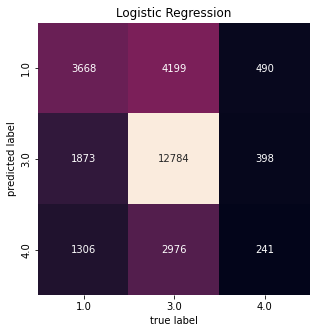

In [14]:
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logistic Regression');

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec = DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred_labels = dec.predict(X_test)

In [ ]:
f1_score(y_test, pred_labels, average = 'macro')

0.45149257917869084

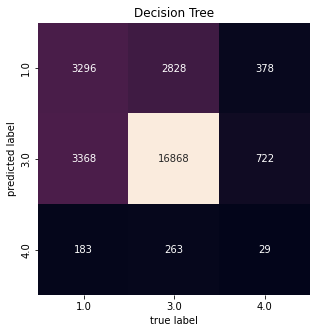

In [ ]:
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree');

[Text(0.5, 0.9, 'X[8] <= 0.5\ngini = 0.667\nsamples = 240123\nvalue = [80041, 80041, 80041]'),
 Text(0.25, 0.7, 'X[14] <= 4.0\ngini = 0.61\nsamples = 99731\nvalue = [18282, 51336, 30113]'),
 Text(0.125, 0.5, 'X[14] <= 3.0\ngini = 0.646\nsamples = 62649\nvalue = [13626, 25055, 23968]'),
 Text(0.0625, 0.3, 'X[14] <= 3.0\ngini = 0.615\nsamples = 48977\nvalue = [9888, 25055, 14034]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[7] <= 0.5\ngini = 0.397\nsamples = 13672\nvalue = [3738, 0, 9934]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[0] <= 1.5\ngini = 0.454\nsamples = 37082\nvalue = [4656, 26281, 6145]'),
 Text(0.3125, 0.3, 'X[13] <= 4127.5\ngini = 0.18\nsamples = 8706\nvalue = [285, 7860, 561]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[15] <= 6.0\ngini = 0.516\nsamples = 28376\nvalue = [4371, 18421, 5584]'),
 Text(0.40625

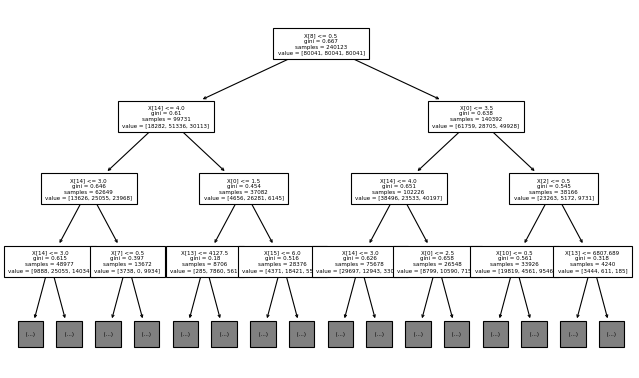

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6), dpi=80)
plot_tree(dec, max_depth=3,fontsize=5,feature_names=[])

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
rf.fit(X_train_sample,y_train_sample)

RandomForestClassifier(random_state=0)

In [ ]:
rf.score(X_test,y_test)

0.7013781993914444

In [ ]:
param_test1 = {
 'n_estimators':range(100,501,50)
}

In [ ]:
gsearch1 = GridSearchCV(RandomForestClassifier(random_state=0), param_test1, n_jobs=-1,verbose=3)
gsearch1.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': range(100, 501, 50)}, verbose=3)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 300}, 0.658)

In [ ]:
param_test1b = {
    'n_estimators': range(260,341,20)
}

In [ ]:
gsearch1b = GridSearchCV(RandomForestClassifier(random_state=0), param_test1b, n_jobs=-1,verbose=3)
gsearch1b.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': range(260, 341, 20)}, verbose=3)

In [ ]:
gsearch1b.best_params_, gsearch1b.best_score_

({'n_estimators': 300}, 0.658)

In [ ]:
param_test2 = {
    'max_depth' : range(3,10,2),
    'min_samples_split' : [0.05,0.1,0.2]
}

In [ ]:
gsearch2 = GridSearchCV(RandomForestClassifier(n_estimators=300,random_state=0), param_test2, n_jobs=-1,verbose=3)
gsearch2.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_samples_split': [0.05, 0.1, 0.2]},
             verbose=3)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 0.05}, 0.6246666666666666)

In [ ]:
param_test2b = {
    'max_depth' : [9,12,20,None],
    'min_samples_split' : [0.05,0.01,2]
}

In [ ]:
gsearch2b = GridSearchCV(RandomForestClassifier(n_estimators=300,random_state=0), param_test2b, n_jobs=-1,verbose=3)
gsearch2b.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 12, 20, None],
                         'min_samples_split': [0.05, 0.01, 2]},
             verbose=3)

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

({'max_depth': 12, 'min_samples_split': 2}, 0.6473333333333333)

In [ ]:
param_test2c = {
    'max_depth' : [11,12,13,16],
}

In [ ]:
gsearch2c = GridSearchCV(RandomForestClassifier(n_estimators=300,random_state=0, min_samples_split=2), param_test2c, n_jobs=-1,verbose=3)
gsearch2c.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             n_jobs=-1, param_grid={'max_depth': [11, 12, 13, 16]}, verbose=3)

In [ ]:
gsearch2c.best_params_, gsearch2c.best_score_

({'max_depth': 11}, 0.6569999999999999)

## Tuned Model

In [9]:
rf_tuned = RandomForestClassifier(n_estimators=300, max_depth = 11, random_state=0)

In [10]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=300, random_state=0)

In [11]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pred_labels = rf_tuned.predict(X_test)

In [13]:
f1_score(y_test, pred_labels, average = 'macro')

0.47385110193547786

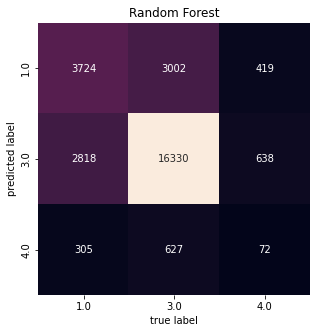

In [14]:
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Random Forest');

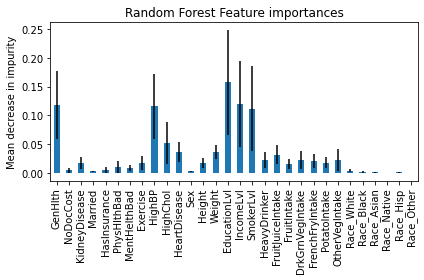

In [ ]:
feature_names = [i for i in X_train.columns]
importances = rf_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tuned.estimators_], axis=0)

rf_tuned_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_tuned_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random Forest Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_tuned, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
feature_names = [i for i in X_train.columns]
rf_tuned_importances = pd.Series(result.importances_mean, index=feature_names)

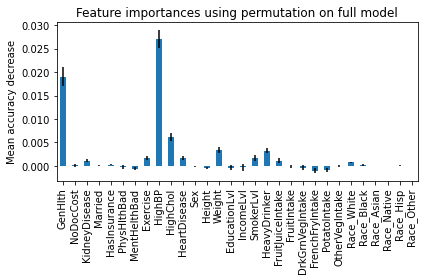

In [17]:
fig, ax = plt.subplots()
rf_tuned_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
X_train.columns

Index(['GenHlth', 'NoDocCost', 'KidneyDisease', 'Married', 'HasInsurance',
       'PhysHlthBad', 'MentHelthBad', 'Exercise', 'HighBP', 'HighChol',
       'HeartDisease', 'Sex', 'Height', 'Weight', 'EducationLvl', 'IncomeLvl',
       'SmokerLvl', 'HeavyDrinker', 'FruitJuiceIntake', 'FruitIntake',
       'DrkGrnVegIntake', 'FrenchFryIntake', 'PotatoIntake', 'OtherVegIntake',
       'Race_White', 'Race_Black', 'Race_Asian', 'Race_Native', 'Race_Hisp',
       'Race_Other'],
      dtype='object')